In [15]:
# import tensorflow as tf

In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

2023-10-20 15:11:58.266892: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-20 15:11:58.287114: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-20 15:11:58.287143: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-20 15:11:58.287156: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-20 15:11:58.291175: I tensorflow/core/platform/cpu_feature_g

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15445386657115308813
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5607784448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10281905751822993994
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2023-10-20 15:11:59.298201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 15:11:59.300862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 15:11:59.300879: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 15:11:59.732750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 15:11:59.732779: I tensorflow/compile

In [9]:
# os.chdir("/mnt/")
import neuraluq as neuq
import neuraluq.variables as neuq_vars
from neuraluq.config import tf

import numpy as np
import scipy.io as sio
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [10]:
!git clone https://github.com/Annaantonin/Data.git

Cloning into 'Data'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 379.76 KiB | 9.99 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [8]:
# rm -rf Data

In [11]:
import Data as data
data = sio.loadmat("Data/sdof_2000.mat")

In [12]:
!git clone https://github.com/Crunch-UQ4MI/neuraluq.git
#!git clone https://github.com/Annaantonin/Data.git
!pip install tensorflow-probability
!pip install scipy
import os
os.chdir("/tf/neuraluq/")
!python setup.py install

fatal: destination path 'neuraluq' already exists and is not an empty directory.

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:314: InformationOnly: Normalizing 'v0.1.0-beta' to '0.1.0b0'
  self.metadata.version = self._normalize_version(
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************

In [8]:
os.listdir(".")

['dataset',
 'README.md',
 'dist',
 'build',
 'output.mat',
 'examples',
 'NeuralUQ.egg-info',
 'output_ukF.mat',
 '.git',
 'setup.py',
 'Data',
 'neuraluq']

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 16:14:30 2023

@author: Antonina
"""

#%%
# Simulated SDOF with:
#K_true=5;
# C_true=0.2236; %system damping ratio 5%

# m=5; %mass for sdof example

def load_data(noise_x, noise_f):

    #data = sio.loadmat(r"G:\My Drive\Python_codes\NNs\sdof_ymeas.mat")
    data = sio.loadmat("Data/sdof_2000.mat")
    #  t_x_train, t_f_train = data["t"], data["ymeas"]
    # data = matdata['data']
    
    x_tt_train, t_train = data["a"], data["t"]
    x_train, f_train = data["u"], data["force"]
    # train_x_tt = t_x_tt_train, x_train
    # train_f = t_f_train, f_train

    return  x_tt_train.T, t_train.T, x_train.T, f_train.T

#m=1
# [0][..., 0:1]     

def pde_fn(t, x, log_c, log_k):
    # log_k=tf.clip(np.log(3),np.log(20)) # to make constrains for the parameters
    x_t = tf.gradients(x, t)                                                                                                                                                                                                                            
    x_tt = tf.gradients(x_t, t)

    f = tf.multiply(x_tt, 5.0)+ tf.exp(log_c) * x_t + tf.exp(log_k) * x

    # return [f,x_tt]
    return f

def pde_xtt(t,x):
    x_t = tf.gradients(x, t)                                                                                                                                                                                                                        
    x_tt = tf.gradients(x_t, t)
    
    return x_tt
    

@neuq.utils.timer
def Trainable(
    x_tt_train, t_train, x_train, f_train, noise, layers, 
):
    # build processes
    
    process_x = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# displacement
    # )
         # posterior=neuq_vars.fnn.Trainable(
         #    layers=layers, regularizer=tf.keras.regularizers.l2(1e-5)
        # ),
    )
    process_log_c = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=0),
    )
    process_log_k = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=0),
    )
    method = neuq.inferences.DEns(
        num_samples=10, num_iterations=20000, optimizer=tf.train.AdamOptimizer(1e-3),
    )

    # build losses
    loss_x = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_tt_train, # could be the problem
        processes=[process_x],
        pde=pde_xtt, # dotdot _X
        multiplier=1.0,
    )
    
    loss_f = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=f_train, 
        processes=[process_x, process_log_c, process_log_k], # tf train
        pde=pde_fn,
        multiplier=1.0,
    )
    # build model
    model = neuq.models.Model(
        processes=[process_x, process_log_c, process_log_k],
        likelihoods=[loss_x, loss_f],
    )
    # assign and compile method
    model.compile(method)
    # obtain posterior samples
    samples = model.run()
    # samples,results = model.run()
    # print("Acceptance rate: %.3f \n" % (np.mean(results)))
    
    processes = [process_x, process_log_c, process_log_k]
    return processes, samples, model


if __name__ == "__main__":

    noise = 0

    x_tt_train, t_train, x_train, f_train = load_data(noise, noise)

    # t_x_tt_train, x_tt_train = train_x_tt
    # t_f_train, f_train = train_f

    layers = [1,128,128 ,1]

    processes, samples, model = Trainable(
        x_tt_train, t_train, x_train, f_train, noise, layers,
    )

    x_pred, logc_pred, logk_pred = model.predict(t_train, samples, processes, pde_fn=None)


2023-10-20 16:00:08.570616: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 16:00:08.570679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 16:00:08.570689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 16:00:08.570949: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-20 16:00:08.570966: I tensorflow/core/co

Supporting backend tensorflow.compat.v1

Compiling a Ensemble method

Generating 0th sample by deep ensemble...


2023-10-20 16:00:08.820109: W tensorflow/c/c_api.cc:305] Operation '{name:'Variable_59/Assign' id:3770 op device:{requested: '', assigned: ''} def:{{{node Variable_59/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](Variable_59, Const_53)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  0 , loss:  1867.6226
Iteration:  1000 , loss:  1423.1913
Iteration:  2000 , loss:  1272.7238
Iteration:  3000 , loss:  1237.0645
Iteration:  4000 , loss:  1205.2139
Iteration:  5000 , loss:  1183.9988
Iteration:  6000 , loss:  1172.1904
Iteration:  7000 , loss:  1171.1351
Iteration:  8000 , loss:  1171.4043
Iteration:  9000 , loss:  1171.1655
Iteration:  10000 , loss:  1171.0481
Iteration:  11000 , loss:  1169.2534
Iteration:  12000 , loss:  1105.05
Iteration:  13000 , loss:  1098.6855
Iteration:  14000 , loss:  1095.731
Iteration:  15000 , loss:  1094.5416
Iteration:  16000 , loss:  1094.8553
Iteration:  17000 , loss:  1020.78735
Iteration:  18000 , loss:  993.97
Iteration:  19000 , loss:  992.6548
Generating 1th sample by deep ensemble...
Iteration:  0 , loss:  1867.3105


2023-10-20 16:00:43.352925: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1421.8962
Iteration:  2000 , loss:  1186.3832
Iteration:  3000 , loss:  1128.274
Iteration:  4000 , loss:  1124.741
Iteration:  5000 , loss:  1123.1472
Iteration:  6000 , loss:  1121.1813
Iteration:  7000 , loss:  1093.854
Iteration:  8000 , loss:  1070.3298
Iteration:  9000 , loss:  1056.5553
Iteration:  10000 , loss:  1031.8206
Iteration:  11000 , loss:  1017.4325
Iteration:  12000 , loss:  1015.9247
Iteration:  13000 , loss:  1014.4323
Iteration:  14000 , loss:  1012.5723
Iteration:  15000 , loss:  1011.39026
Iteration:  16000 , loss:  1010.0231
Iteration:  17000 , loss:  1009.3315
Iteration:  18000 , loss:  1011.9484
Iteration:  19000 , loss:  1008.3925
Generating 2th sample by deep ensemble...
Iteration:  0 , loss:  1867.4772


2023-10-20 16:01:17.897483: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1410.1785
Iteration:  2000 , loss:  1276.1838
Iteration:  3000 , loss:  1263.9851
Iteration:  4000 , loss:  1254.7869
Iteration:  5000 , loss:  1243.4194
Iteration:  6000 , loss:  1243.2483
Iteration:  7000 , loss:  1242.2705
Iteration:  8000 , loss:  1241.0485
Iteration:  9000 , loss:  1218.7036
Iteration:  10000 , loss:  1204.6028
Iteration:  11000 , loss:  1192.4143
Iteration:  12000 , loss:  1173.0015
Iteration:  13000 , loss:  1171.5388
Iteration:  14000 , loss:  1171.2258
Iteration:  15000 , loss:  1171.0038
Iteration:  16000 , loss:  1170.9934
Iteration:  17000 , loss:  1170.7516
Iteration:  18000 , loss:  1170.9971
Iteration:  19000 , loss:  1170.587
Generating 3th sample by deep ensemble...
Iteration:  0 , loss:  1867.5729


2023-10-20 16:01:51.816565: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1392.2898
Iteration:  2000 , loss:  1247.7179
Iteration:  3000 , loss:  1118.3224
Iteration:  4000 , loss:  1092.449
Iteration:  5000 , loss:  1082.9885
Iteration:  6000 , loss:  1076.4976
Iteration:  7000 , loss:  1073.8469
Iteration:  8000 , loss:  1069.7168
Iteration:  9000 , loss:  1063.8959
Iteration:  10000 , loss:  1053.3416
Iteration:  11000 , loss:  1038.3448
Iteration:  12000 , loss:  1026.2003
Iteration:  13000 , loss:  1013.9437
Iteration:  14000 , loss:  1000.2861
Iteration:  15000 , loss:  995.6417
Iteration:  16000 , loss:  982.84827
Iteration:  17000 , loss:  975.12854
Iteration:  18000 , loss:  974.10693
Iteration:  19000 , loss:  973.2754
Generating 4th sample by deep ensemble...
Iteration:  0 , loss:  1869.5514


2023-10-20 16:02:26.416077: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1422.3826
Iteration:  2000 , loss:  1280.9084
Iteration:  3000 , loss:  1218.3186
Iteration:  4000 , loss:  1172.8623
Iteration:  5000 , loss:  1169.8522
Iteration:  6000 , loss:  1167.5875
Iteration:  7000 , loss:  1166.1824
Iteration:  8000 , loss:  1161.7064
Iteration:  9000 , loss:  1154.1418
Iteration:  10000 , loss:  1135.0986
Iteration:  11000 , loss:  1123.139
Iteration:  12000 , loss:  1117.2456
Iteration:  13000 , loss:  1101.981
Iteration:  14000 , loss:  1096.5496
Iteration:  15000 , loss:  1092.1403
Iteration:  16000 , loss:  1081.4769
Iteration:  17000 , loss:  1072.5309
Iteration:  18000 , loss:  1070.1981
Iteration:  19000 , loss:  1064.7777
Generating 5th sample by deep ensemble...
Iteration:  0 , loss:  1868.1951


2023-10-20 16:03:06.413217: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1444.0555
Iteration:  2000 , loss:  1303.513
Iteration:  3000 , loss:  1268.4918
Iteration:  4000 , loss:  1265.6342
Iteration:  5000 , loss:  1254.9182
Iteration:  6000 , loss:  1241.3439
Iteration:  7000 , loss:  1207.3489
Iteration:  8000 , loss:  1176.2573
Iteration:  9000 , loss:  1171.1398
Iteration:  10000 , loss:  1170.5143
Iteration:  11000 , loss:  1170.024
Iteration:  12000 , loss:  1169.4727
Iteration:  13000 , loss:  1162.6699
Iteration:  14000 , loss:  1150.7878
Iteration:  15000 , loss:  1149.4417
Iteration:  16000 , loss:  1147.1277
Iteration:  17000 , loss:  1130.9172
Iteration:  18000 , loss:  1083.1882
Iteration:  19000 , loss:  1078.4875
Generating 6th sample by deep ensemble...
Iteration:  0 , loss:  1867.394


2023-10-20 16:03:41.944608: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1453.7284
Iteration:  2000 , loss:  1200.9578
Iteration:  3000 , loss:  1126.8799
Iteration:  4000 , loss:  1124.2379
Iteration:  5000 , loss:  1122.6575
Iteration:  6000 , loss:  1124.3916
Iteration:  7000 , loss:  1116.865
Iteration:  8000 , loss:  1109.7805
Iteration:  9000 , loss:  1062.8391
Iteration:  10000 , loss:  1039.0967
Iteration:  11000 , loss:  1033.9187
Iteration:  12000 , loss:  988.7946
Iteration:  13000 , loss:  986.50977
Iteration:  14000 , loss:  984.623
Iteration:  15000 , loss:  983.40234
Iteration:  16000 , loss:  982.4234
Iteration:  17000 , loss:  981.65045
Iteration:  18000 , loss:  981.2757
Iteration:  19000 , loss:  980.9722
Generating 7th sample by deep ensemble...
Iteration:  0 , loss:  1867.4438


2023-10-20 16:04:17.297988: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1398.0693
Iteration:  2000 , loss:  1261.7837
Iteration:  3000 , loss:  1223.0831
Iteration:  4000 , loss:  1199.9713
Iteration:  5000 , loss:  1171.7319
Iteration:  6000 , loss:  1152.0532
Iteration:  7000 , loss:  1148.1699
Iteration:  8000 , loss:  1145.6934
Iteration:  9000 , loss:  1142.4824
Iteration:  10000 , loss:  1138.7915
Iteration:  11000 , loss:  1133.3595
Iteration:  12000 , loss:  1125.3904
Iteration:  13000 , loss:  1116.9691
Iteration:  14000 , loss:  1106.4066
Iteration:  15000 , loss:  1101.2583
Iteration:  16000 , loss:  1099.2672
Iteration:  17000 , loss:  1097.3646
Iteration:  18000 , loss:  1096.1334
Iteration:  19000 , loss:  1094.5607
Generating 8th sample by deep ensemble...
Iteration:  0 , loss:  1867.279


2023-10-20 16:04:53.050976: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1349.0042
Iteration:  2000 , loss:  1239.5482
Iteration:  3000 , loss:  1036.7306
Iteration:  4000 , loss:  990.14526
Iteration:  5000 , loss:  948.14594
Iteration:  6000 , loss:  919.4915
Iteration:  7000 , loss:  917.30176
Iteration:  8000 , loss:  914.35913
Iteration:  9000 , loss:  913.5962
Iteration:  10000 , loss:  915.7494
Iteration:  11000 , loss:  897.68744
Iteration:  12000 , loss:  850.5554
Iteration:  13000 , loss:  798.4763
Iteration:  14000 , loss:  788.70996
Iteration:  15000 , loss:  770.0188
Iteration:  16000 , loss:  762.65356
Iteration:  17000 , loss:  757.94305
Iteration:  18000 , loss:  755.1582
Iteration:  19000 , loss:  751.4492
Generating 9th sample by deep ensemble...
Iteration:  0 , loss:  1867.4579


2023-10-20 16:05:35.710349: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_4/Assign' id:4441 op device:{requested: '', assigned: ''} def:{{{node beta2_power_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_4, beta2_power_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1404.4336
Iteration:  2000 , loss:  1165.9957
Iteration:  3000 , loss:  1147.1497
Iteration:  4000 , loss:  1130.3179
Iteration:  5000 , loss:  1110.7322
Iteration:  6000 , loss:  1076.0483
Iteration:  7000 , loss:  1072.4108
Iteration:  8000 , loss:  1067.1996
Iteration:  9000 , loss:  1060.1477
Iteration:  10000 , loss:  1048.9749
Iteration:  11000 , loss:  1034.1226
Iteration:  12000 , loss:  1030.7494
Iteration:  13000 , loss:  1025.4423
Iteration:  14000 , loss:  1023.57153
Iteration:  15000 , loss:  1022.10895
Iteration:  16000 , loss:  1020.92114
Iteration:  17000 , loss:  1019.69824
Iteration:  18000 , loss:  1019.09326
Iteration:  19000 , loss:  1018.93115
Execution time for 'Trainable' function is: 367.304 s, 6.122 mins


In [ ]:
# [a.shape for a in samples]

In [ ]:
# x_pred, logc_pred, logk_pred = model.predict(t_train, samples, processes, pde_fn=None)
# x_pred, logc_pred, logk_pred = model.predict(t_train, samples, processes, pde_fn=pde_fn)

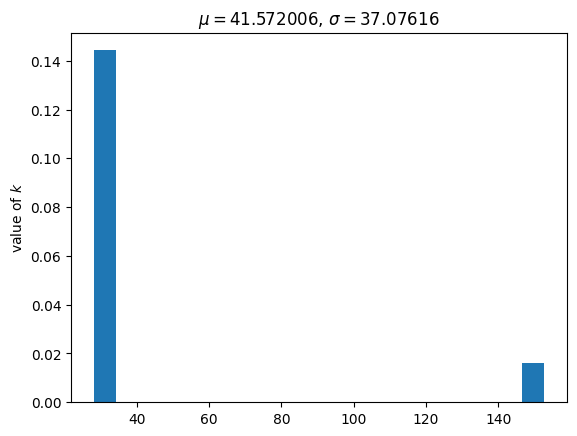

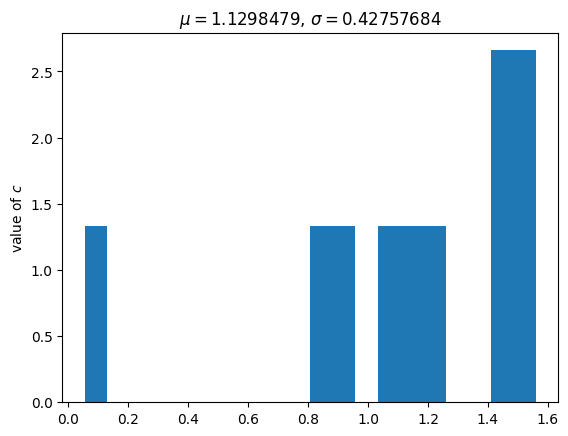

In [25]:
neuq.utils.hist(np.exp(logk_pred).flatten(), name="value of $k$")
neuq.utils.hist(np.exp(logc_pred).flatten(), name="value of $c$")

In [26]:
Csamp=samples[6]    
Ksamp=samples[7]
C_post=np.exp(np.mean(Csamp))
print("C_true=0.22(Ns/m) and C_post =", C_post) 
K_post=np.exp(np.mean(Ksamp))
print("K_true=10(N/m) and K_post =", K_post) 


C_true=0.22(Ns/m) and C_post = 0.8978342
K_true=10(N/m) and K_post = 34.450584


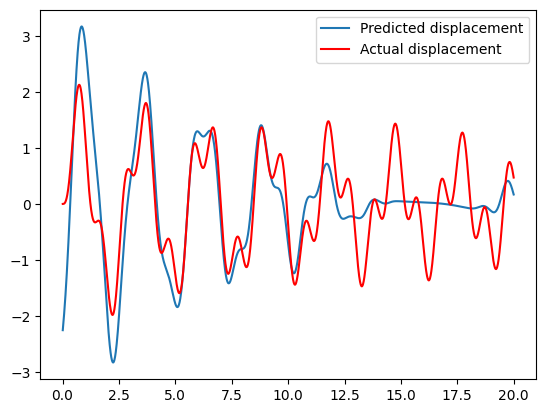

In [27]:
plt.plot(t_train,np.mean(x_pred,axis=(0, 2)),label='Predicted displacement')
plt.plot(t_train,x_train,'r',label='Actual displacement')
plt.legend()

In [ ]:
# sio.savemat("G:/My Drive/Python_codes/sdof0.mat", {"x_pred":x_pred, "k":samples[7].flatten(),"c":samples[6].flatten()})

In [31]:
data_to_save = {
   "x_pred":x_pred, "c":samples[6].flatten(),"k":samples[7].flatten()
}
file_name = 'output.mat'
sio.savemat(file_name, data_to_save)